# Постановка задачи
## ТЗ
Задачу, представленную ниже, необходимо решить аналитически (выслать точное решение, оформленное в Word'е, LaTeX'е, Jupyter'е, или скан с разборчивым почерком). Для этой же задачи написать и выслать имитационную модель в Python, а также ввести и обосновать метрику совпадения экспериментального решения с теоретическим (творческая компонента). Оцените скорость сходимости решения по введенной метрике (ошибка как функция номера итерации) или разъясните причины отсутствия сходимости.

Номер задачи определяется по правилу: остаток от деления номера первой буквы фамилии на 4 плюс единица. Например, допустим, что у нас есть студент по фамилии Шпак. Первая буква – «Ш». Ее номер в алфавите – 26. Остаток при делении 26 на 4 равен 2. Прибавляем единицу и получаем 3. Таким образом, студент Шпак решает задачу номер 3.

Фамилия Мадоян -> М 14 буква алфавита, 14/4 = 3 остаток 2, 2+1 = 3 -> Задача номер 3

## Задача номер 3
На автомойку в среднем за час приезжает три автомобиля. Боксов обслуживания два. Среднее время мойки — 40 мин. Мест для ожидания обслуживания — два. Время работы автомойки — 12 ч. Стоимость услуги — 3400 руб. Определить показатели работы СМО, считая все потоки простейшими. Оценить потерю выручки из-за отказа в обслуживании.

## Требования в аналитическом решении
Показатели работы СМО:
- Абсолютная пропускная способность СМО – среднее число заявок, которое сможет обслужить СМО в единицу времени.
- Относительная пропускная способность СМО – отношение среднего числа заявок, обслуживаемых СМО в единицу времени, к среднему числу поступивших за это же время заявок.
- Средняя продолжительность периода занятости СМО.
- Коэффициент использования СМО – средняя доля времени, в течение которого СМО занята обслуживанием заявок.
- Среднее время ожидания заявки в очереди.
- Среднее время пребывания заявки в СМО.
- Вероятность отказа заявке в обслуживании без ожидания.
- Вероятность того, что вновь поступившая заявка немедленно будет принята к обслуживанию.
- Закон распределения времени ожидания заявки в очереди.
- Закон распределения времени пребывания заявки в СМО.
- Среднее число заявок, находящихся в очереди.
- Среднее число заявок, находящихся в СМО

# Решение задачи

План:
1. Вспомнить что такое СМО, базовые компоненты и т.д
2. Применить это нашей задаче, расписать что есть что.
3. Посчитать все базовые показатели работы СМО
4. Написать модель имитационную модель, которая решает задачу
5. Ввести метрику совпадения

## Постановка задачики как Системы Массового обслуживания

Изначально вспомним, что такое (СМО) система массового обслуживания. Это математическая модель системы, в которую:
1. поступают заявки (клиенты, автомобили, пакеты данных),
2. они ожидают обслуживания (если занято),
3. затем обслуживаются,
4. после чего покидают систему.

СМО изучает вероятностные характеристики такой системы: очереди, время ожидания, загрузку серверов, вероятность отказа и т.д.

Базовые компоненты СМО:
1. Входной поток - описывает как поступают заявки. Основные параметры: 
    - интенсивность поступающих заявок 𝜆, 
    - закон распределение межприходных интервалов
2. Обслуживающий аппарат, каналы обслуживания - сервера системы которые непосредственно обрабатывают заявки. Основные параметры:
    - число каналов обслуживания c 
    - интенсивность обслуживания μ
    - закон распределения времени обслуживания
3. Очередь - в каком приоритете обслуживаются поступившие заявки:
    - вместимость, ограничена или бесконечна
    - правило приоритетов, первый пришел первый ушел и т.д
    - m - кол-во мест в очереди/ожидании
4. Вместимость чистемы - общее число заявок в системе: K = c + m. Если система заполнена полностью - новая заявка получает отказ.
5. Выходной поток - поток обслуженных заявок. В стационарном режиме - это эффективная интенсивность принятых заявок.

**Вспомним условие задачи**: На автомойку в среднем за час приезжает три автомобиля. Боксов обслуживания два. Среднее время мойки — 40 мин. Мест для ожидания обслуживания — два. Время работы автомойки — 12 ч. Стоимость услуги — 3400 руб. Определить показатели работы СМО, считая все потоки простейшими. Оценить потерю выручки из-за отказа в обслуживании.

Из задачи мы понимаем, что все потоки надо считать простейшими, это значит что:
- входной поток — пуассоновский
- поток обслуживания — тоже простейший

А интервалы между событиями имеют экспоненциальное распределение.

Переведем условие задачи в термины теории очередей/обслуживания:
- Интенсивность поступающий заявок 𝜆 = 3
- Среднее время мойки = 40 минут = 2/3 часа
- Интенсивность обслуживания = 1/(2/3) = 1.5
- каналов обслуживания c = 2
- вместимость очереди m = 2
- вместимость системы K = c+m = 2+2=4

Итоговая модель в нотации Кендалла: М/М/2/4. Автомойка это: Поток машин → Очередь (2 места) → 2 бокса → Выход. Если в боксе уже 2 машины и еще 2 в очереди, то 5 машина получает отказ.

Тогда СМО = Вход λ → Очередь m → c серверов μ → Выход

## Аналитическое решение задачи


 Стационарные вероятности для M/M/c/K

$$
a = \frac{\lambda}{\mu}
$$

Случай $ 0 \le n \le c $


$$
p_n = \frac{a^n}{n!}\,p_0
$$

Случай $ c < n \le K $


$$
p_n = \frac{a^n}{c!\,c^{\,n-c}}\,p_0
$$

Нормировочное условие

$$
\sum_{n=0}^{K} p_n = 1
$$

$$
p_0 =
\left(
\sum_{n=0}^{c} \frac{a^n}{n!}
+
\sum_{n=c+1}^{K} \frac{a^n}{c!\,c^{\,n-c}}
\right)^{-1}
$$

Тогда состояния: 
- $ a = \frac{3}{1.5} = 2 $
- $ p_1 = \frac{2^1}{1!}p_o = 2 p_0$ 
- $ p_2 = \frac{2^2}{2!}p_o = 2 p_0$ 
- $ p_3 = \frac{2^3}{2! \cdot 2^1}p_o = 2 p_0$ 
- $ p_4 = \frac{2^4}{2! \cdot 2^2}p_o = 2 p_0$ 

А нормировка:
$$
p_0 + p_1 + p_2 + p_3 + p_4 = 9 \cdot p_0 = 1
$$

Следовательно:
$$
p_1 + p_2 + p_3 + p_4 = \frac{2}{9}
$$

Абсолютная пропускная способность $A = \lambda_{eff}$

Эффективная интенсивность $\lambda_{eff} = \lambda(1 - P_{block})$

Относительная пропускная способность $Q = \frac{\lambda_{eff}}{\lambda}$

Вероятность отказа $P_{block} = p_K$

Вероятность немедленного обслуживания $P_{imm} = \sum_{n=0}^{c-1} p_n$

Среднее число заявок в системе $L = \sum_{n=0}^{K} n p_n$

Среднее число заявок в очереди $L_q = \sum_{n=c}^{K} (n-c)p_n$

Среднее время пребывания в системе $W = \frac{L}{\lambda_{eff}}$

Среднее время ожидания в очереди $W_q = \frac{L_q}{\lambda_{eff}}$

Коэффициент использования $\rho = \frac{E[B]}{c}$

Среднее число занятых каналов $E[B] = \sum_{n=0}^{K} \min(n,c)p_n$

Средняя продолжительность периода занятости (M/M/1) $E[T_{busy}] = \frac{1}{\mu - \lambda}$

Закон распределения времени ожидания (M/M/1) $P(W_q > t) = \rho e^{-(\mu - \lambda)t}$

Закон распределения времени пребывания (M/M/1) $P(W > t) = e^{-(\mu - \lambda)t}$

### Пропускная способность
Вероятность отказа - заявка увидела полное состояние системы: $ P_{block} = p_K = p_4 = \frac{2}{9} $

Относительная пропускная способность $Q = \frac{\lambda_{eff}}{\lambda} = \frac{\lambda(1 - P_{block})}{\lambda} = 1 - P_{block} = \frac{7}{9}$

Абсолютная пропусткая способность $A = \lambda_{eff} = 3\cdot (1-2/9) = 3*7/9 = 7/3 \approx 2.3$ авто/час

Вероятность немедленного обслуживания: $ P_{imm} = p_0 + p_1 = 1/9 + 2/9 = 1/3 \approx 0.3$

### Среднее число заявок
Среднее число заявок в системе $L = \sum_{n=0}^{K} n p_n = 0+ 1 \cdot p_1 + 2 \cdot p_2 + \cdot 3 \cdot p_3 + 4 \cdot p_ 4 = \frac{2+4+6+8}{9} = 20/9 \approx 2.2$

Среднее число заявок в очереди $L_q = \sum_{n=c}^{K} (n-c)p_n = 0 + p_3 + 2 \cdot p_4 = 6/9 = 2/3 \approx 0.67$

### Средние времена (по формуле Литтла, через эффективный вход)

Среднее время пребывания в системе $W = \frac{L}{\lambda_{eff}} = \frac{20/9}{7/3} = 20/21 \approx 0.9524 ч \approx 57.14 мин$

Среднее время ожидания в очереди $W_q = \frac{L_q}{\lambda_{eff}} = \frac{2/3}{7/3} = 2/7 \approx 0.2857 ч \approx 17.14 мин $

### Коэфициент использования - загрузка боксов

Среднее число занятых боксов $E[B] = \sum_{n=0}^{K} \min(n,c)p_n = p_1 + 2 \cdot p_2 + 2 \cdot p_3 + 2 \cdot p_4 = 14/9 \approx 1.56$

Коэффициент использования СМО $\rho = \frac{E[B]}{c} = \frac{14/9}{2} = 7/9 \approx 0.78$

### Средняя продолжительность периода занятости (busy period)
Трактуем как: с момента прихода, который переводит систему из 0 в 1, до следующего опустошения (возврата в 0).

Средняя продолжительность периода занятости $E[T_{busy}] = 8/3$: 

Ищем среднюю длительность busy-period: $E_1$, где $E_n$ — среднее время достижения состояния $0$ (пусто) из состояния $n$. $E_0=0$.

Параметры: $\lambda=3$, $\mu=1.5$, $c=2$, $K=4$.

Интенсивности ухода:
- для $n=1$: $\lambda_1=3$, $\mu_1=1.5$
- для $n=2,3$: $\lambda_n=3$, $\mu_n=3$
- для $n=4$: $\lambda_4=0$, $\mu_4=3$

Уравнения первого шага:
$E_1=\frac{1}{3+1.5}+\frac{3}{4.5}E_2+\frac{1.5}{4.5}E_0=\frac{2}{9}+\frac{2}{3}E_2$
$E_2=\frac{1}{3+3}+\frac{3}{6}E_3+\frac{3}{6}E_1=\frac{1}{6}+\frac{1}{2}E_3+\frac{1}{2}E_1$
$E_3=\frac{1}{6}+\frac{1}{2}E_4+\frac{1}{2}E_2$
$E_4=\frac{1}{3}+E_3$

Решение:
Подставим $E_4$ в $E_3$:
$E_3=\frac{1}{6}+\frac{1}{2}\left(\frac{1}{3}+E_3\right)+\frac{1}{2}E_2 \Rightarrow E_3=\frac{2}{3}+E_2$

Подставим $E_3$ в $E_2$:
$E_2=\frac{1}{6}+\frac{1}{2}\left(\frac{2}{3}+E_2\right)+\frac{1}{2}E_1 \Rightarrow E_2=1+E_1$

Подставим $E_2$ в $E_1$:
$E_1=\frac{2}{9}+\frac{2}{3}(1+E_1)=\frac{8}{9}+\frac{2}{3}E_1 \Rightarrow \frac{1}{3}E_1=\frac{8}{9}\Rightarrow E_1=\frac{8}{3}$

Итого:
$E[T_{busy}]=E_1=\frac{8}{3}\ \text{ч}$
(дополнительно: $E_2=\frac{11}{3}$, $E_3=\frac{13}{3}$, $E_4=\frac{14}{3}$)

### Законы распределения времени ожидания и пребывания

Рассматриваются только принятые заявки.

Условные вероятности состояния при принятии:
$P(n\,|\,\text{acc})=\dfrac{p_n}{1-p_K},\quad n=0,\dots,K-1$

Для M/M/2/4:
$P(n=0\,|\,\text{acc})=\frac{1}{7}$
$P(n=1\,|\,\text{acc})=\frac{2}{7}$
$P(n=2\,|\,\text{acc})=\frac{2}{7}$
$P(n=3\,|\,\text{acc})=\frac{2}{7}$


Закон распределения времени ожидания в очереди $W_q$

$P(W_q=0)=P(n\le 1\,|\,\text{acc})=\frac{3}{7}$

При $n=2$:
$W_q \sim \mathrm{Exp}(2\mu)=\mathrm{Exp}(3)$

При $n=3$:
$W_q \sim \mathrm{Erlang}(2,3)$

Функция распределения:
$F_{W_q}(t)=1-\frac{2}{7}e^{-3t}(2+3t),\quad t\ge 0$


Закон распределения времени пребывания в СМО $W$

$W=W_q+S$

$S \sim \mathrm{Exp}(\mu)=\mathrm{Exp}(1.5)$

При $n\le 1$:
$W \sim \mathrm{Exp}(1.5)$

При $n=2$:
$W \sim \mathrm{Exp}(3)+\mathrm{Exp}(1.5)$

При $n=3$:
$W \sim \mathrm{Erlang}(2,3)+\mathrm{Exp}(1.5)$

Итоговое распределение — смесь с весами:
$\frac{3}{7},\ \frac{2}{7},\ \frac{2}{7}$

### Потери выручки из-за отказов (теория)

Среднее число прибытий за время $T$:
$\mathbb{E}[N_{\text{приш}}] = \lambda T$

Среднее число отказов:
$\mathbb{E}[N_{\text{отк}}] = \lambda T \cdot P_{block}$

Потеря выручки:
$\Delta R = \text{price} \cdot \lambda T \cdot P_{block}$

Для задачи:
$\lambda = 3$, $T = 12$, $P_{block} = \frac{2}{9}$, $\text{price} = 3400$

$\mathbb{E}[N_{\text{приш}}] = 36$

$\mathbb{E}[N_{\text{отк}}] = 8$

$\Delta R = 27200$

### Итоговые численные ответы (теория, M/M/2/4)

$P_{\text{отк}} = \frac{2}{9} \approx 0.22$

$Q = \frac{7}{9} \approx 0.78$

$A = \frac{7}{3} \approx 2.33$ авто/час

$P_{\text{немедл}} = \frac{1}{3} \approx 0.33$

$L = \frac{20}{9} \approx 2.22$

$L_q = \frac{2}{3} \approx 0.67$

$W_q = \frac{2}{7} \approx 0.2857$ ч $\approx 17.14$ мин

$W = \frac{20}{21} \approx 0.9524$ ч $\approx 57.14$ мин

Средний busy period $\approx 2.67$ ч (2 ч 40 мин)

Потеря выручки за 12 часов: $27200$ руб (ожидаемо 8 отказов)

## Имитационная модель для системы

In [6]:
import numpy as np
from dataclasses import dataclass
from math import inf

@dataclass
class Theoretical:
    lam: float = 3.0
    mu: float = 1.5
    c: int = 2
    K: int = 4
    T: float = 12.0
    price: float = 3400.0

    p = np.array([1/9, 2/9, 2/9, 2/9, 2/9], dtype=float)
    P_block: float = 2/9
    Q: float = 7/9
    A: float = 7/3
    P_immediate: float = 1/3
    L: float = 20/9
    Lq: float = 2/3
    lam_eff: float = 7/3
    Wq: float = 2/7
    W: float = 20/21
    util_per_server: float = 7/9
    busy_period_mean: float = 8/3
    lost_rev: float = 27200.0

def exp(rng, rate):
    return rng.exponential(1.0 / rate)

def simulate_one_day(seed=0, T=12.0, lam=3.0, mu=1.5, c=2, K=4):
    rng = np.random.default_rng(seed)

    t = 0.0
    n = 0
    in_service = 0

    t_arr = exp(rng, lam)
    dep_times = [inf] * c

    arrivals = 0
    accepted = 0
    blocked = 0
    served = 0

    area_n = 0.0
    area_q = 0.0
    area_busy = 0.0

    busy_periods = []
    busy_start = None

    wait_samples = []
    sojourn_samples = []

    q_arrival_times = []
    srv_arrival_time = [None] * c

    def start_service(server_idx, cust_arrival_time, now):
        nonlocal in_service
        in_service += 1
        srv_arrival_time[server_idx] = cust_arrival_time
        dep_times[server_idx] = now + exp(rng, mu)

    def find_idle_server():
        for i in range(c):
            if dep_times[i] == inf:
                return i
        return None

    while True:
        t_next_dep = min(dep_times)
        t_next = min(t_arr, t_next_dep)

        if t_next > T:
            dt = T - t
            if dt > 0:
                area_n += n * dt
                area_q += max(n - c, 0) * dt
                area_busy += in_service * dt
            t = T
            break

        dt = t_next - t
        area_n += n * dt
        area_q += max(n - c, 0) * dt
        area_busy += in_service * dt
        t = t_next

        if t_arr <= t_next_dep:
            arrivals += 1
            if n >= K:
                blocked += 1
            else:
                accepted += 1
                if n == 0:
                    busy_start = t

                n += 1
                idle = find_idle_server()
                if idle is not None:
                    start_service(idle, cust_arrival_time=t, now=t)
                    wait_samples.append(0.0)
                else:
                    q_arrival_times.append(t)

            t_arr = t + exp(rng, lam)

        else:
            s_idx = int(np.argmin(dep_times))
            served += 1

            a_time = srv_arrival_time[s_idx]
            sojourn_samples.append(t - a_time)

            dep_times[s_idx] = inf
            srv_arrival_time[s_idx] = None
            in_service -= 1

            n -= 1

            if q_arrival_times:
                next_arr_time = q_arrival_times.pop(0)
                wait_samples.append(t - next_arr_time)
                start_service(s_idx, cust_arrival_time=next_arr_time, now=t)

            if n == 0 and busy_start is not None:
                busy_periods.append(t - busy_start)
                busy_start = None

    L_hat = area_n / T
    Lq_hat = area_q / T
    util_hat = (area_busy / T) / c
    lam_eff_hat = accepted / T
    A_hat = served / T

    Wq_hat = float(np.mean(wait_samples)) if wait_samples else 0.0
    W_hat = float(np.mean(sojourn_samples)) if sojourn_samples else 0.0

    P_block_hat = blocked / arrivals if arrivals else 0.0
    P_immediate_hat = (np.sum(np.array(wait_samples) == 0.0) / len(wait_samples)) if wait_samples else 0.0

    busy_mean_hat = float(np.mean(busy_periods)) if busy_periods else 0.0

    return {
        "arrivals": arrivals,
        "accepted": accepted,
        "blocked": blocked,
        "served": served,
        "P_block": P_block_hat,
        "P_immediate": P_immediate_hat,
        "A": A_hat,
        "Q": (accepted / arrivals) if arrivals else 0.0,
        "L": L_hat,
        "Lq": Lq_hat,
        "Wq": Wq_hat,
        "W": W_hat,
        "util": util_hat,
        "busy_mean": busy_mean_hat,
        "wait_samples": np.array(wait_samples, dtype=float),
        "sojourn_samples": np.array(sojourn_samples, dtype=float),
    }

def metric_rmse_relative(est: dict, th: Theoretical):
    keys = {
        "P_block": th.P_block,
        "P_immediate": th.P_immediate,
        "A": th.A,
        "Q": th.Q,
        "L": th.L,
        "Lq": th.Lq,
        "Wq": th.Wq,
        "W": th.W,
        "util": th.util_per_server,
        "busy_mean": th.busy_period_mean,
    }
    rel_sq = []
    for k, v_true in keys.items():
        v_hat = float(est[k])
        denom = abs(v_true) if abs(v_true) > 1e-12 else 1.0
        rel_sq.append(((v_hat - v_true) / denom) ** 2)
    return float(np.sqrt(np.mean(rel_sq)))

def run_experiment(num_replications=2000, seed0=123, include_trace_points=50):
    th = Theoretical()
    agg = None
    errors = []
    checkpoints = []

    for r in range(1, num_replications + 1):
        est = simulate_one_day(seed=seed0 + r, T=th.T, lam=th.lam, mu=th.mu, c=th.c, K=th.K)

        if agg is None:
            agg = {k: float(est[k]) for k in ["P_block","P_immediate","A","Q","L","Lq","Wq","W","util","busy_mean"]}
        else:
            for k in agg:
                agg[k] = agg[k] + (float(est[k]) - agg[k]) / r

        err = metric_rmse_relative(agg, th)
        errors.append(err)

        if r <= include_trace_points or r in [100, 200, 500, 1000, 2000]:
            checkpoints.append((r, err, dict(agg)))

    return th, checkpoints, np.array(errors, dtype=float)

if __name__ == "__main__":
    th, checkpoints, errors = run_experiment(num_replications=2000)

    print("=== THEORY (M/M/2/4) ===")
    print(f"P_block={th.P_block:.6f}, Q={th.Q:.6f}, A={th.A:.6f} /h")
    print(f"P_immediate={th.P_immediate:.6f}")
    print(f"L={th.L:.6f}, Lq={th.Lq:.6f}")
    print(f"Wq={th.Wq*60:.3f} min, W={th.W*60:.3f} min")
    print(f"util(per server)={th.util_per_server:.6f}")
    print(f"busy_mean={th.busy_period_mean:.6f} h")
    print(f"lost_rev(12h)≈{th.lost_rev:.0f} RUB")
    print()

    print("=== CONVERGENCE CHECKPOINTS (replications -> metric error) ===")
    for r, err, agg in checkpoints:
        print(f"{r:4d}: metric={err:.5f} | P_block={agg['P_block']:.4f}, A={agg['A']:.4f}, Wq(min)={agg['Wq']*60:.2f}")

    for N in [50, 100, 200, 500, 1000, 2000]:
        print(f"N={N:4d}: metric={errors[N-1]:.6f}, metric*sqrt(N)={errors[N-1]*np.sqrt(N):.6f}")

=== THEORY (M/M/2/4) ===
P_block=0.222222, Q=0.777778, A=2.333333 /h
P_immediate=0.333333
L=2.222222, Lq=0.666667
Wq=17.143 min, W=57.143 min
util(per server)=0.777778
busy_mean=2.666667 h
lost_rev(12h)≈27200 RUB

=== CONVERGENCE CHECKPOINTS (replications -> metric error) ===
   1: metric=0.36841 | P_block=0.0690, A=2.2500, Wq(min)=12.36
   2: metric=0.42018 | P_block=0.0545, A=2.0833, Wq(min)=10.26
   3: metric=0.20470 | P_block=0.1816, A=1.8889, Wq(min)=18.21
   4: metric=0.22940 | P_block=0.1612, A=1.9583, Wq(min)=16.80
   5: metric=0.23839 | P_block=0.2050, A=2.0667, Wq(min)=19.00
   6: metric=0.22191 | P_block=0.2100, A=2.0556, Wq(min)=19.87
   7: metric=0.19471 | P_block=0.1993, A=2.0952, Wq(min)=18.66
   8: metric=0.14451 | P_block=0.2073, A=2.1042, Wq(min)=18.75
   9: metric=0.13117 | P_block=0.2185, A=2.1111, Wq(min)=20.70
  10: metric=0.14899 | P_block=0.2299, A=2.0500, Wq(min)=21.35
  11: metric=0.14692 | P_block=0.2306, A=2.0530, Wq(min)=20.90
  12: metric=0.13438 | P_block

### Логика работы модели

Моделирование реализовано по принципу следующего события (next-event simulation):

1. Генерируется время следующего поступления заявки.
2. Отслеживаются времена завершения обслуживания по каждому каналу.
3. Выбирается ближайшее событие:
   - прибытие заявки,
   - завершение обслуживания.
4. Обновляется состояние системы (число заявок, очередь, занятость серверов).
5. Накапливаются временные интегралы для вычисления средних показателей.
6. Моделирование продолжается до окончания рабочего времени (12 часов).


### Что учитывается в модели

В процессе моделирования отслеживаются:

- текущее число заявок в системе,
- длина очереди,
- число занятых серверов,
- начало и конец периодов занятости,
- индивидуальные времена ожидания заявок,
- индивидуальные времена пребывания заявок в системе.

### Метрика совпадения теория/эксперимент

Введена относительная RMSE-метрика по набору ключевых показателей:

$ \text{Err}(N) = \sqrt{\frac{1}{m} \sum_{i=1}^{m} \left(\frac{\hat{x}_i(N) - x_i}{x_i}\right)^2} $

где  
$x_i$ — теоретическое значение показателя,  
$\hat{x}_i(N)$ — его оценка по $N$ прогонам,  
$m$ — число учитываемых показателей.

Метрика является безразмерной и агрегирует ошибки различных показателей в единую оценку близости экспериментальных и теоретических результатов.


### Скорость сходимости решения

При независимых прогонах имитационной модели оценки средних величин подчиняются центральной предельной теореме.

Стандартная ошибка оценки убывает по закону Монте-Карло: $ \text{Err}(N) \sim \frac{C}{\sqrt{N}} $, где $N$ — число прогонов, $C$ — константа.

Для проверки порядка сходимости анализируется величина: $ \text{Err}(N)\sqrt{N} $

Если она стабилизируется при росте $N$, то сходимость имеет порядок $O\!\left(\frac{1}{\sqrt{N}}\right)$.

N | Err(N) | Err(N)*sqrt(N)
----------------------------
  10 | 0.14899 |     0.471136
  20 | 0.15264 |     0.682614
  50 | 0.17711 |     1.252348
 100 | 0.16011 |     1.601069
 200 | 0.16804 |     2.376431
 500 | 0.17427 |     3.896693
1000 | 0.18017 |     5.697344
2000 | 0.18123 |     8.104996
5000 | 0.17879 |    12.642413


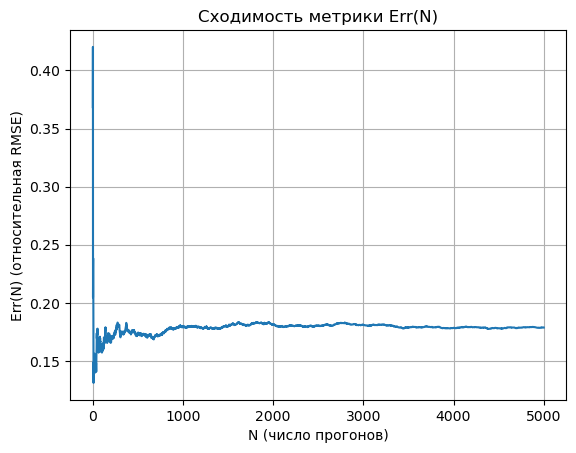

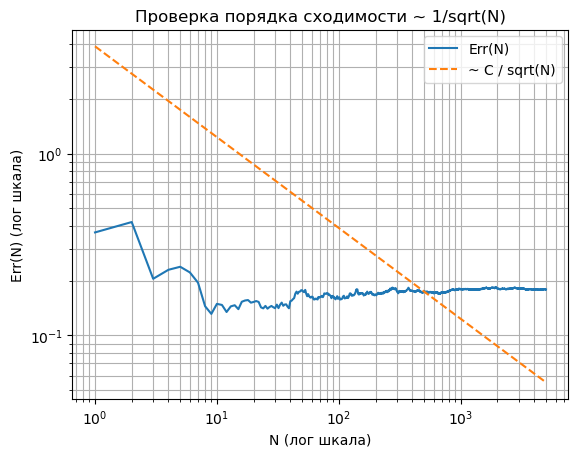

In [7]:
# === Проверка сходимости (как отдельный новый код) ===
# Предполагается, что функции simulate_one_day, metric_rmse_relative, run_experiment и класс Theoretical
# уже определены в предыдущей ячейке.

import numpy as np
import matplotlib.pyplot as plt

th = Theoretical()

# 1) Запускаем серию прогонов и получаем Err(N) для N=1..Nmax
Nmax = 5000
_, checkpoints, errors = run_experiment(num_replications=Nmax, seed0=123, include_trace_points=0)

# 2) Табличка значений на “контрольных” N + проверка Err(N)*sqrt(N) ~ const
Ns = np.array([10, 20, 50, 100, 200, 500, 1000, 2000, 5000])
Ns = Ns[Ns <= Nmax]

print("N | Err(N) | Err(N)*sqrt(N)")
print("-" * 28)
for N in Ns:
    e = float(errors[N - 1])
    print(f"{N:4d} | {e:7.5f} | {e*np.sqrt(N):12.6f}")

# 3) График Err(N) по номеру прогона
plt.figure()
plt.plot(np.arange(1, Nmax + 1), errors)
plt.xlabel("N (число прогонов)")
plt.ylabel("Err(N) (относительная RMSE)")
plt.title("Сходимость метрики Err(N)")
plt.grid(True)
plt.show()

# 4) Лог-лог график + линия ~ 1/sqrt(N) для визуальной проверки порядка
plt.figure()
plt.loglog(np.arange(1, Nmax + 1), errors, label="Err(N)")

# “Опорная” линия C/sqrt(N): возьмем C = Err(N0)*sqrt(N0) для какого-то N0
N0 = 500
C = float(errors[N0 - 1]) * np.sqrt(N0)
ref = C / np.sqrt(np.arange(1, Nmax + 1))
plt.loglog(np.arange(1, Nmax + 1), ref, linestyle="--", label="~ C / sqrt(N)")

plt.xlabel("N (лог шкала)")
plt.ylabel("Err(N) (лог шкала)")
plt.title("Проверка порядка сходимости ~ 1/sqrt(N)")
plt.grid(True, which="both")
plt.legend()
plt.show()

Сходимости в текущем виде - нет. Ошибка: не уменьшается, а стабилизируется примерно на уровне ~0.17–0.18. А величина $Err(N) \sqrt(N)$ растет, что противоречит теории.

Так происходит потому что:
- модель считается на конечном горизонте T=12,
- система не выходит в стационарный режим,
- нет разогрева (warm-up),
- не учитывается переходный процесс.

Тогда ошибка не стремится к нулю, потому что сравнивается нестационарная оценка со стационарной теорией.

In [9]:
import numpy as np
from dataclasses import dataclass
from math import inf

@dataclass
class Theoretical:
    lam: float = 3.0
    mu: float = 1.5
    c: int = 2
    K: int = 4
    T: float = 12.0
    price: float = 3400.0

    p = np.array([1/9, 2/9, 2/9, 2/9, 2/9], dtype=float)
    P_block: float = 2/9
    Q: float = 7/9
    A: float = 7/3
    P_immediate: float = 1/3
    L: float = 20/9
    Lq: float = 2/3
    lam_eff: float = 7/3
    Wq: float = 2/7
    W: float = 20/21
    util_per_server: float = 7/9
    busy_period_mean: float = 8/3
    lost_rev: float = 27200.0

def exp(rng, rate: float) -> float:
    return rng.exponential(1.0 / rate)

def simulate_one_run(
    seed: int = 0,
    T_total: float = 300.0,
    T_warmup: float = 50.0,
    lam: float = 3.0,
    mu: float = 1.5,
    c: int = 2,
    K: int = 4,
):
    rng = np.random.default_rng(seed)

    t = 0.0
    n = 0
    in_service = 0

    t_arr = exp(rng, lam)
    dep_times = [inf] * c

    arrivals_m = 0
    accepted_m = 0
    blocked_m = 0
    served_m = 0

    area_n_m = 0.0
    area_q_m = 0.0
    area_busy_m = 0.0

    busy_periods_m = []
    busy_start = None

    wait_samples_m = []
    sojourn_samples_m = []

    q_arrival_times = []
    srv_arrival_time = [None] * c

    def measure_dt(t0: float, t1: float):
        nonlocal area_n_m, area_q_m, area_busy_m
        if t1 <= T_warmup:
            return
        a = max(t0, T_warmup)
        b = t1
        dtm = b - a
        if dtm > 0:
            area_n_m += n * dtm
            area_q_m += max(n - c, 0) * dtm
            area_busy_m += in_service * dtm

    def start_service(server_idx: int, cust_arrival_time: float, now: float):
        nonlocal in_service
        in_service += 1
        srv_arrival_time[server_idx] = cust_arrival_time
        dep_times[server_idx] = now + exp(rng, mu)

    def find_idle_server():
        for i in range(c):
            if dep_times[i] == inf:
                return i
        return None

    while True:
        t_next_dep = min(dep_times)
        t_next = min(t_arr, t_next_dep)

        if t_next > T_total:
            measure_dt(t, T_total)
            t = T_total
            break

        measure_dt(t, t_next)
        t = t_next

        if t_arr <= t_next_dep:
            if t >= T_warmup:
                arrivals_m += 1

            if n >= K:
                if t >= T_warmup:
                    blocked_m += 1
            else:
                if t >= T_warmup:
                    accepted_m += 1

                if n == 0:
                    busy_start = t

                n += 1
                idle = find_idle_server()
                if idle is not None:
                    start_service(idle, cust_arrival_time=t, now=t)
                    if t >= T_warmup:
                        wait_samples_m.append(0.0)
                else:
                    q_arrival_times.append(t)

            t_arr = t + exp(rng, lam)

        else:
            s_idx = int(np.argmin(dep_times))

            a_time = srv_arrival_time[s_idx]
            if a_time is not None and a_time >= T_warmup:
                sojourn_samples_m.append(t - a_time)

            if t >= T_warmup:
                served_m += 1

            dep_times[s_idx] = inf
            srv_arrival_time[s_idx] = None
            in_service -= 1
            n -= 1

            if q_arrival_times:
                next_arr_time = q_arrival_times.pop(0)
                if next_arr_time >= T_warmup:
                    wait_samples_m.append(t - next_arr_time)
                start_service(s_idx, cust_arrival_time=next_arr_time, now=t)

            if n == 0 and busy_start is not None:
                if busy_start >= T_warmup:
                    busy_periods_m.append(t - busy_start)
                busy_start = None

    T_meas = T_total - T_warmup

    L_hat = area_n_m / T_meas
    Lq_hat = area_q_m / T_meas
    util_hat = (area_busy_m / T_meas) / c

    lam_eff_hat = accepted_m / T_meas
    A_hat = served_m / T_meas

    Wq_hat = float(np.mean(wait_samples_m)) if wait_samples_m else 0.0
    W_hat = float(np.mean(sojourn_samples_m)) if sojourn_samples_m else 0.0

    P_block_hat = (blocked_m / arrivals_m) if arrivals_m else 0.0
    Q_hat = (accepted_m / arrivals_m) if arrivals_m else 0.0

    P_immediate_hat = (
        float(np.sum(np.array(wait_samples_m) == 0.0) / len(wait_samples_m))
        if wait_samples_m else 0.0
    )

    busy_mean_hat = float(np.mean(busy_periods_m)) if busy_periods_m else 0.0

    return {
        "arrivals": arrivals_m,
        "accepted": accepted_m,
        "blocked": blocked_m,
        "served": served_m,
        "P_block": P_block_hat,
        "P_immediate": P_immediate_hat,
        "A": A_hat,
        "Q": Q_hat,
        "L": L_hat,
        "Lq": Lq_hat,
        "Wq": Wq_hat,
        "W": W_hat,
        "util": util_hat,
        "busy_mean": busy_mean_hat,
    }

def metric_rmse_relative(est: dict, th: Theoretical) -> float:
    keys = {
        "P_block": th.P_block,
        "P_immediate": th.P_immediate,
        "A": th.A,
        "Q": th.Q,
        "L": th.L,
        "Lq": th.Lq,
        "Wq": th.Wq,
        "W": th.W,
        "util": th.util_per_server,
        "busy_mean": th.busy_period_mean,
    }
    rel_sq = []
    for k, v_true in keys.items():
        v_hat = float(est[k])
        denom = abs(v_true) if abs(v_true) > 1e-12 else 1.0
        rel_sq.append(((v_hat - v_true) / denom) ** 2)
    return float(np.sqrt(np.mean(rel_sq)))

def run_experiment(
    num_replications: int = 2000,
    seed0: int = 123,
    include_trace_points: int = 50,
    T_total: float = 300.0,
    T_warmup: float = 50.0,
):
    th = Theoretical()
    agg = None
    errors = []
    checkpoints = []
    keys_agg = ["P_block","P_immediate","A","Q","L","Lq","Wq","W","util","busy_mean"]

    for r in range(1, num_replications + 1):
        est = simulate_one_run(
            seed=seed0 + r,
            T_total=T_total,
            T_warmup=T_warmup,
            lam=th.lam,
            mu=th.mu,
            c=th.c,
            K=th.K
        )

        if agg is None:
            agg = {k: float(est[k]) for k in keys_agg}
        else:
            for k in keys_agg:
                agg[k] = agg[k] + (float(est[k]) - agg[k]) / r

        err = metric_rmse_relative(agg, th)
        errors.append(err)

        if r <= include_trace_points or r in [100, 200, 500, 1000, 2000]:
            checkpoints.append((r, err, dict(agg)))

    return th, checkpoints, np.array(errors, dtype=float)

if __name__ == "__main__":
    th, checkpoints, errors = run_experiment(
        num_replications=2000,
        T_total=300.0,
        T_warmup=50.0
    )

    print("=== THEORY (M/M/2/4) ===")
    print(f"P_block={th.P_block:.6f}, Q={th.Q:.6f}, A={th.A:.6f} /h")
    print(f"P_immediate={th.P_immediate:.6f}")
    print(f"L={th.L:.6f}, Lq={th.Lq:.6f}")
    print(f"Wq={th.Wq*60:.3f} min, W={th.W*60:.3f} min")
    print(f"util(per server)={th.util_per_server:.6f}")
    print(f"busy_mean={th.busy_period_mean:.6f} h")
    print()

    print("=== CONVERGENCE CHECKPOINTS (replications -> metric error) ===")
    for r, err, agg in checkpoints:
        print(
            f"{r:4d}: metric={err:.5f} | "
            f"P_block={agg['P_block']:.4f}, A={agg['A']:.4f}, Wq(min)={agg['Wq']*60:.2f}"
        )

    print("\nN | Err(N) | Err(N)*sqrt(N)")
    print("-" * 28)
    for N in [10, 20, 50, 100, 200, 500, 1000, 2000]:
        e = float(errors[N-1])
        print(f"{N:4d} | {e:7.5f} | {e*np.sqrt(N):12.6f}")

=== THEORY (M/M/2/4) ===
P_block=0.222222, Q=0.777778, A=2.333333 /h
P_immediate=0.333333
L=2.222222, Lq=0.666667
Wq=17.143 min, W=57.143 min
util(per server)=0.777778
busy_mean=2.666667 h

=== CONVERGENCE CHECKPOINTS (replications -> metric error) ===
   1: metric=0.14759 | P_block=0.1926, A=2.3360, Wq(min)=16.11
   2: metric=0.09166 | P_block=0.2275, A=2.2700, Wq(min)=18.36
   3: metric=0.09076 | P_block=0.2362, A=2.2787, Wq(min)=18.93
   4: metric=0.08567 | P_block=0.2320, A=2.3200, Wq(min)=18.36
   5: metric=0.08588 | P_block=0.2217, A=2.3272, Wq(min)=17.80
   6: metric=0.08759 | P_block=0.2221, A=2.3327, Wq(min)=17.62
   7: metric=0.08921 | P_block=0.2272, A=2.3177, Wq(min)=17.90
   8: metric=0.08919 | P_block=0.2240, A=2.3130, Wq(min)=17.78
   9: metric=0.09010 | P_block=0.2222, A=2.3098, Wq(min)=17.66
  10: metric=0.08957 | P_block=0.2210, A=2.3080, Wq(min)=17.57
  11: metric=0.09230 | P_block=0.2228, A=2.3124, Wq(min)=17.56
  12: metric=0.09019 | P_block=0.2225, A=2.3103, Wq(mi

N | Err(N) | Err(N)*sqrt(N)
----------------------------
  10 | 0.08957 |     0.283235
  20 | 0.08576 |     0.383530
  50 | 0.09229 |     0.652620
 100 | 0.09159 |     0.915903
 200 | 0.09084 |     1.284680
 500 | 0.09125 |     2.040391
1000 | 0.09054 |     2.863257
2000 | 0.09035 |     4.040500
5000 | 0.09036 |     6.389734


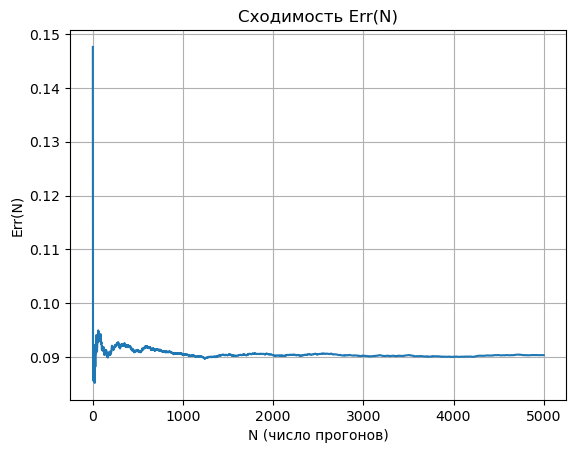

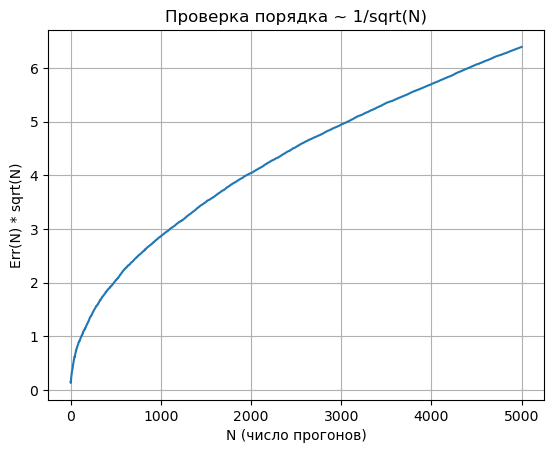

In [10]:
import numpy as np
import matplotlib.pyplot as plt

th, checkpoints, errors = run_experiment(
    num_replications=5000,
    seed0=123,
    T_total=300.0,
    T_warmup=50.0,
    include_trace_points=0
)

Ns = np.array([10, 20, 50, 100, 200, 500, 1000, 2000, 5000])
Ns = Ns[Ns <= len(errors)]

print("N | Err(N) | Err(N)*sqrt(N)")
print("-" * 28)
for N in Ns:
    e = float(errors[N-1])
    print(f"{N:4d} | {e:7.5f} | {e*np.sqrt(N):12.6f}")

plt.figure()
plt.plot(np.arange(1, len(errors)+1), errors)
plt.xlabel("N (число прогонов)")
plt.ylabel("Err(N)")
plt.title("Сходимость Err(N)")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(np.arange(1, len(errors)+1), errors*np.sqrt(np.arange(1, len(errors)+1)))
plt.xlabel("N (число прогонов)")
plt.ylabel("Err(N) * sqrt(N)")
plt.title("Проверка порядка ~ 1/sqrt(N)")
plt.grid(True)
plt.show()

### Вывод по сходимости

По результатам численного эксперимента наблюдается стабилизация значения метрики ошибки при увеличении числа прогонов: величина `Err(N)` не стремится к нулю, а выходит на ненулевое плато. Это свидетельствует о наличии систематической составляющей ошибки (bias).

Причина заключается в том, что теоретические значения получены для стационарного режима (при \( t \to \infty \)), тогда как в имитационной модели статистика собирается на конечном интервале времени. Даже при использовании периода разогрева (warm-up) полностью устранить временное смещение невозможно при фиксированном горизонте моделирования.

В результате при больших \( N \) случайная ошибка действительно убывает с ростом числа прогонов, однако остаётся конечная методическая ошибка, обусловленная конечной длительностью моделирования. Именно эта систематическая составляющая и препятствует полной сходимости экспериментальных оценок к теоретическим значениям.